In [2]:
import pandas as pd

# Load the uploaded CSV file to inspect its contents
file_path = "Top100.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
df.head()


,Ticker,Company Name,Sector
0,AAPL,Apple Inc.,Technology
1,MSFT,Microsoft Corporation,Technology
2,AMZN,"Amazon.com, Inc.",Consumer Discretionary
3,GOOGL,Alphabet Inc. (Class A),Communication Services
4,GOOG,Alphabet Inc. (Class C),Communication Services


In [11]:
import yfinance as yf
import pandas as pd

# Define tickers (modify as needed)
tickers = ["AAPL", "MSFT", "AMZN", "NVDA", "META", "TSLA", "GOOGL", "NFLX", "ADBE", "^GSPC"]

# Define date range (Last 1 Year)
start_date = "2023-02-10"
end_date = "2024-02-10"

# Fetch stock data
data = yf.download(tickers, start=start_date, end=end_date, progress=False)["Close"]
# data = yf.download(tickers, start=start_date, end=end_date, progress=False)
print(data.head())  # Check what columns exist


# Save to CSV
file_path = "historical_stock_data.csv"
data.to_csv(file_path)

print(f"✅ Historical stock data saved to {file_path}")


Ticker            AAPL        ADBE        AMZN      GOOGL        META  \
Date                                                                    
2023-02-10  149.666672  370.989990   97.610001  94.228416  173.487274   
2023-02-13  152.481430  375.000000   99.540001  94.268272  178.747208   
2023-02-14  151.837189  377.899994   99.699997  94.338020  178.796997   
2023-02-15  153.948257  375.940002  101.160004  96.589851  176.485825   
2023-02-16  152.342682  365.160004   98.150002  95.165016  171.783798   

Ticker            MSFT        NFLX       NVDA        TSLA        ^GSPC  
Date                                                                    
2023-02-10  258.851990  347.359985  21.249546  196.889999  4090.459961  
2023-02-13  266.939209  358.570007  21.772163  194.639999  4137.290039  
2023-02-14  267.775574  359.959991  22.954304  209.250000  4136.129883  
2023-02-15  265.635223  361.420013  22.747454  214.240005  4147.600098  
2023-02-16  258.563324  350.709991  21.986008  202

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load pre-downloaded historical stock data
data_file = "historical_stock_data.csv"
data = pd.read_csv(data_file, index_col=0, parse_dates=True)

# ✅ Load tickers from Best100.csv
file_path = "Top100.csv"
df = pd.read_csv(file_path)
tickers = df["Ticker"].tolist()

# ✅ Define benchmark and Magnificent 7
benchmark_ticker = "^GSPC"
magnificent_7 = ["AAPL", "MSFT", "AMZN", "NVDA", "META", "TSLA", "GOOG"]

# ✅ Ensure all tickers exist in historical data
available_tickers = [ticker for ticker in tickers if ticker in data.columns]
available_magnificent_7 = [ticker for ticker in magnificent_7 if ticker in data.columns]

# ✅ Drop missing values
data.dropna(inplace=True)

# ✅ Calculate daily returns
returns = data.pct_change().dropna()

# ✅ Construct equal-weighted portfolio (Main tickers)
num_assets = len(available_tickers)
weights = np.ones(num_assets) / num_assets if num_assets > 0 else []

# ✅ Portfolio returns (Excluding S&P 500 & Magnificent 7)
portfolio_returns = returns[available_tickers].dot(weights) if num_assets > 0 else pd.Series()

# ✅ Benchmark (S&P 500) returns
benchmark_returns = returns[benchmark_ticker] if benchmark_ticker in data.columns else pd.Series()

# ✅ Magnificent 7 portfolio returns (Equal-weighted)
magnificent_7_weights = np.ones(len(available_magnificent_7)) / len(available_magnificent_7) if available_magnificent_7 else []
magnificent_7_returns = returns[available_magnificent_7].dot(magnificent_7_weights) if available_magnificent_7 else pd.Series()

# ✅ Calculate cumulative returns
portfolio_cum_returns = (1 + portfolio_returns).cumprod() if not portfolio_returns.empty else pd.Series()
benchmark_cum_returns = (1 + benchmark_returns).cumprod() if not benchmark_returns.empty else pd.Series()
magnificent_7_cum_returns = (1 + magnificent_7_returns).cumprod() if not magnificent_7_returns.empty else pd.Series()

# ✅ Investment Growth ($100,000 in each)
initial_investment = 100000
portfolio_value = portfolio_cum_returns * initial_investment if not portfolio_cum_returns.empty else pd.Series()
benchmark_value = benchmark_cum_returns * initial_investment if not benchmark_cum_returns.empty else pd.Series()
magnificent_7_value = magnificent_7_cum_returns * initial_investment if not magnificent_7_cum_returns.empty else pd.Series()



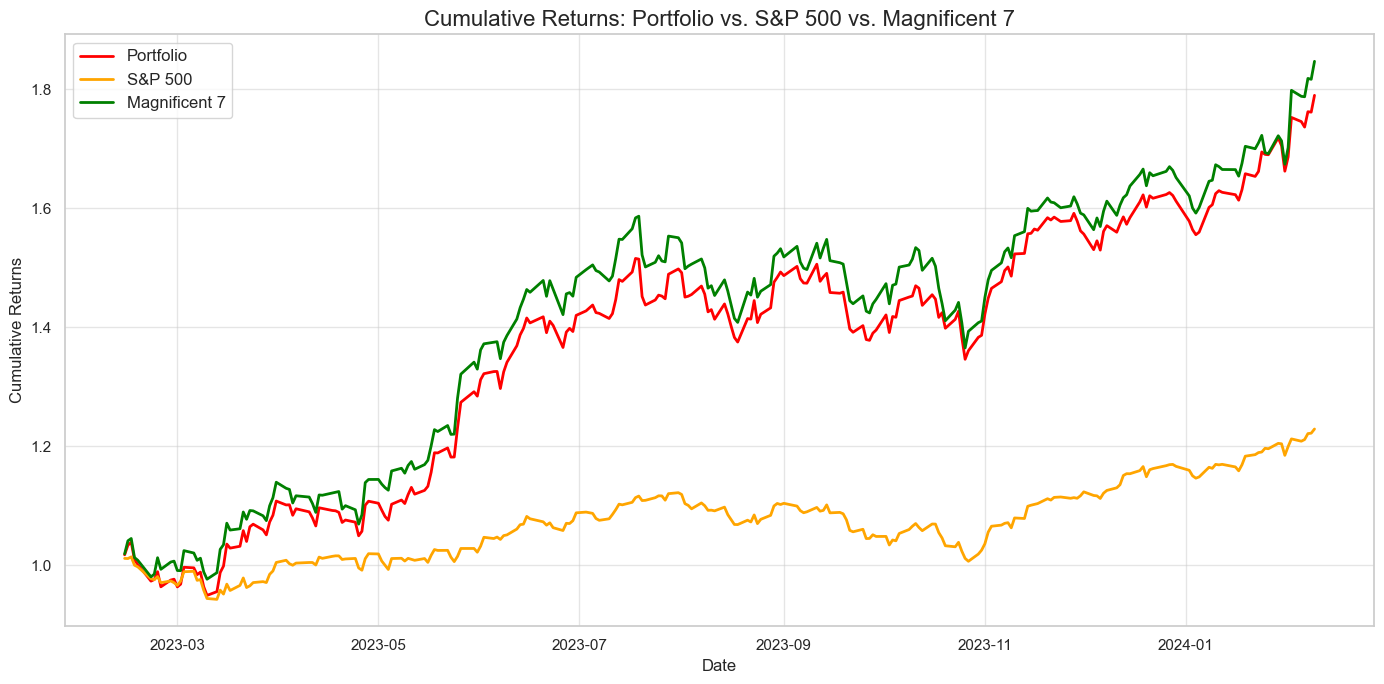

In [14]:
# ✅ Visualization
sns.set_theme(style="whitegrid", palette="muted")

# 1️⃣ **Cumulative Returns: Portfolio vs. S&P 500 vs. Magnificent 7**
plt.figure(figsize=(14, 7))
if not portfolio_cum_returns.empty: plt.plot(portfolio_cum_returns, label="Portfolio", color="red", linewidth=2)
if not benchmark_cum_returns.empty: plt.plot(benchmark_cum_returns, label="S&P 500", color="orange", linewidth=2)
if not magnificent_7_cum_returns.empty: plt.plot(magnificent_7_cum_returns, label="Magnificent 7", color="green", linewidth=2)
plt.title("Cumulative Returns: Portfolio vs. S&P 500 vs. Magnificent 7", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Returns", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()



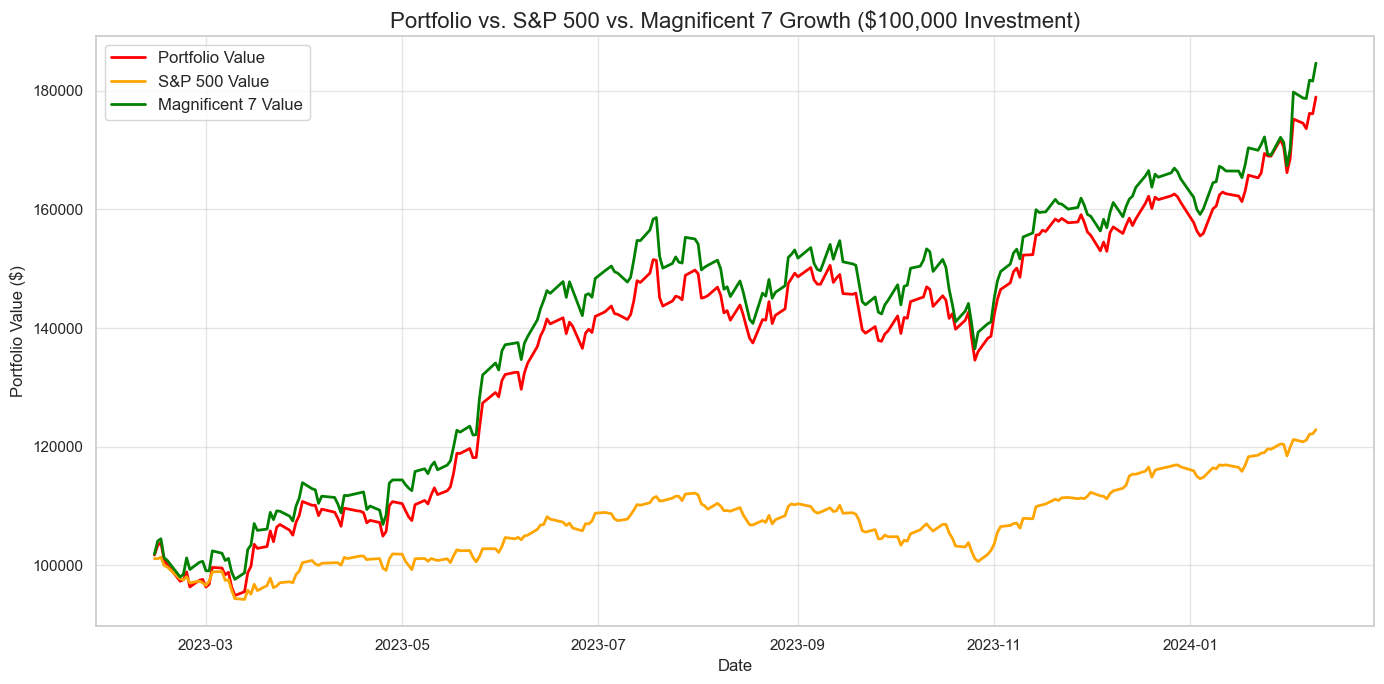

In [15]:
# 2️⃣ **Portfolio vs S&P 500 vs Magnificent 7 Growth ($100,000 Investment)**
plt.figure(figsize=(14, 7))
if not portfolio_value.empty: plt.plot(portfolio_value, label="Portfolio Value", color="red", linewidth=2)
if not benchmark_value.empty: plt.plot(benchmark_value, label="S&P 500 Value", color="orange", linewidth=2)
if not magnificent_7_value.empty: plt.plot(magnificent_7_value, label="Magnificent 7 Value", color="green", linewidth=2)
plt.title("Portfolio vs. S&P 500 vs. Magnificent 7 Growth ($100,000 Investment)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Portfolio Value ($)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

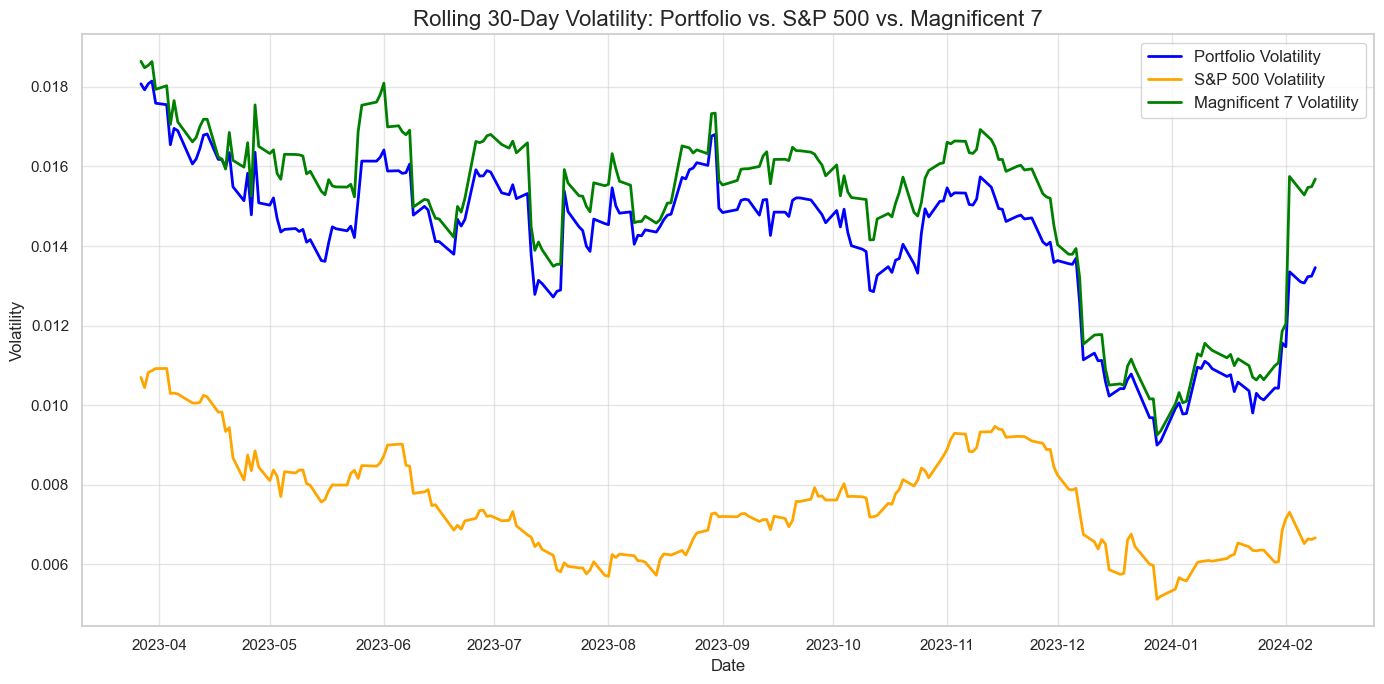

In [16]:
# 3️⃣ **Rolling 30-Day Volatility: Portfolio vs. S&P 500 vs. Magnificent 7**
plt.figure(figsize=(14, 7))
if not portfolio_returns.empty: plt.plot(portfolio_returns.rolling(30).std(), label="Portfolio Volatility", color="blue", linewidth=2)
if not benchmark_returns.empty: plt.plot(benchmark_returns.rolling(30).std(), label="S&P 500 Volatility", color="orange", linewidth=2)
if not magnificent_7_returns.empty: plt.plot(magnificent_7_returns.rolling(30).std(), label="Magnificent 7 Volatility", color="green", linewidth=2)
plt.title("Rolling 30-Day Volatility: Portfolio vs. S&P 500 vs. Magnificent 7", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volatility", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()



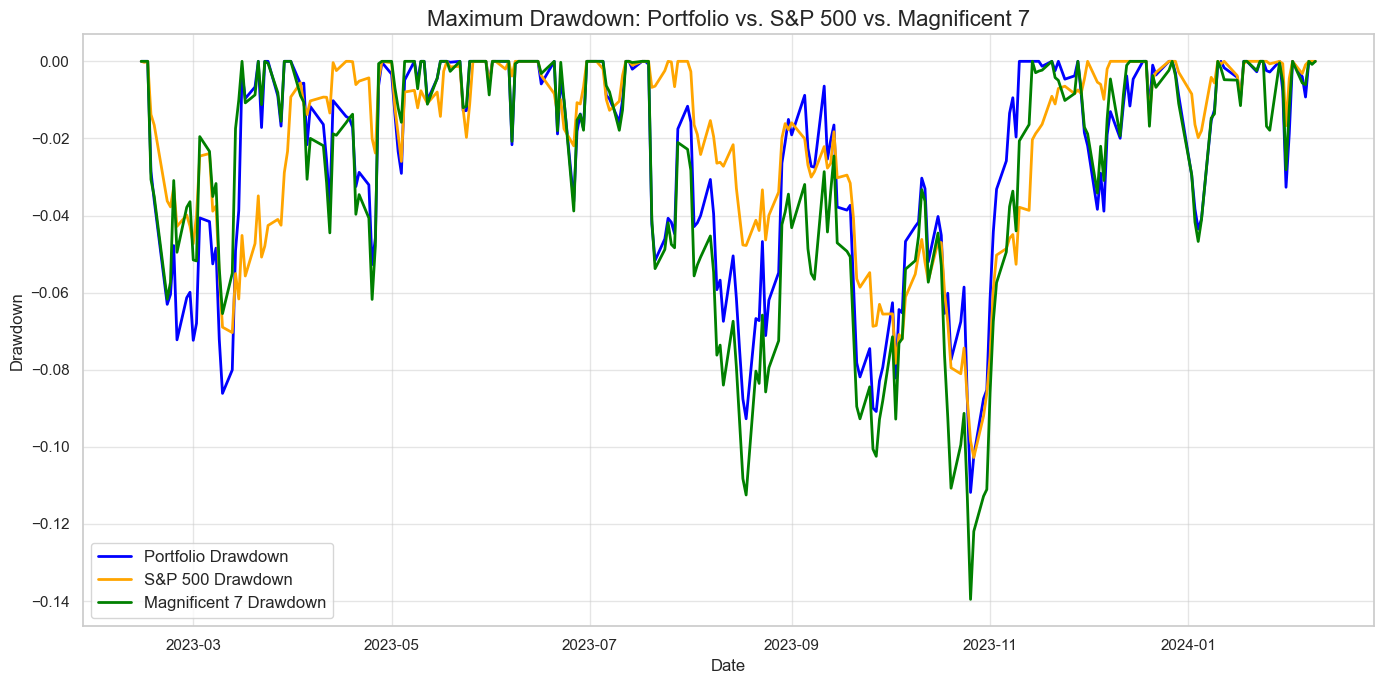

In [19]:

# 4️⃣ **Maximum Drawdown: Portfolio vs. S&P 500 vs. Magnificent 7**
plt.figure(figsize=(14, 7))
if not portfolio_cum_returns.empty: plt.plot((portfolio_cum_returns / portfolio_cum_returns.cummax()) - 1, label="Portfolio Drawdown", color="blue", linewidth=2)
if not benchmark_cum_returns.empty: plt.plot((benchmark_cum_returns / benchmark_cum_returns.cummax()) - 1, label="S&P 500 Drawdown", color="orange", linewidth=2)
if not magnificent_7_cum_returns.empty: plt.plot((magnificent_7_cum_returns / magnificent_7_cum_returns.cummax()) - 1, label="Magnificent 7 Drawdown", color="green", linewidth=2)
plt.title("Maximum Drawdown: Portfolio vs. S&P 500 vs. Magnificent 7", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Drawdown", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

In [20]:
from datetime import datetime, timedelta

# ✅ Calculate the start date for the last 6 months
end_filter = data.index.max()  # Latest available date in dataset
start_filter = end_filter - timedelta(days=180)  # Approximate 6 months

# ✅ Ensure filtering is within available data range
portfolio_cum_returns_filtered = portfolio_cum_returns.loc[start_filter:end_filter] if not portfolio_cum_returns.empty else pd.Series()
benchmark_cum_returns_filtered = benchmark_cum_returns.loc[start_filter:end_filter] if not benchmark_cum_returns.empty else pd.Series()
magnificent_7_cum_returns_filtered = magnificent_7_cum_returns.loc[start_filter:end_filter] if not magnificent_7_cum_returns.empty else pd.Series()

portfolio_returns_filtered = portfolio_returns.loc[start_filter:end_filter] if not portfolio_returns.empty else pd.Series()
benchmark_returns_filtered = benchmark_returns.loc[start_filter:end_filter] if not benchmark_returns.empty else pd.Series()
magnificent_7_returns_filtered = magnificent_7_returns.loc[start_filter:end_filter] if not magnificent_7_returns.empty else pd.Series()

# ✅ Investment Growth ($100,000 in each)
initial_investment = 100000
portfolio_value_filtered = portfolio_cum_returns_filtered * initial_investment if not portfolio_cum_returns_filtered.empty else pd.Series()
benchmark_value_filtered = benchmark_cum_returns_filtered * initial_investment if not benchmark_cum_returns_filtered.empty else pd.Series()
magnificent_7_value_filtered = magnificent_7_cum_returns_filtered * initial_investment if not magnificent_7_cum_returns_filtered.empty else pd.Series()

# ✅ Visualization
sns.set_theme(style="whitegrid", palette="muted")



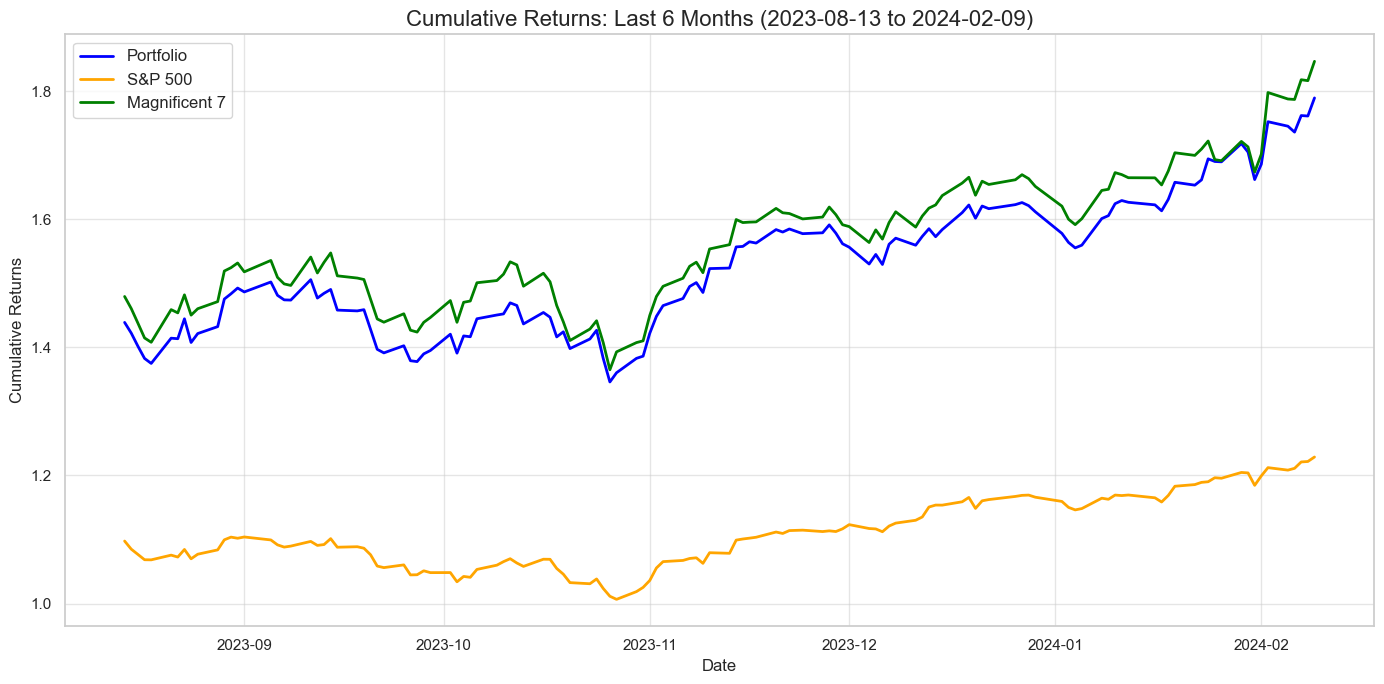

In [21]:
# 1️⃣ **Cumulative Returns for Last 6 Months**
plt.figure(figsize=(14, 7))
if not portfolio_cum_returns_filtered.empty: plt.plot(portfolio_cum_returns_filtered, label="Portfolio", color="blue", linewidth=2)
if not benchmark_cum_returns_filtered.empty: plt.plot(benchmark_cum_returns_filtered, label="S&P 500", color="orange", linewidth=2)
if not magnificent_7_cum_returns_filtered.empty: plt.plot(magnificent_7_cum_returns_filtered, label="Magnificent 7", color="green", linewidth=2)
plt.title(f"Cumulative Returns: Last 6 Months ({start_filter.date()} to {end_filter.date()})", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Cumulative Returns", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()



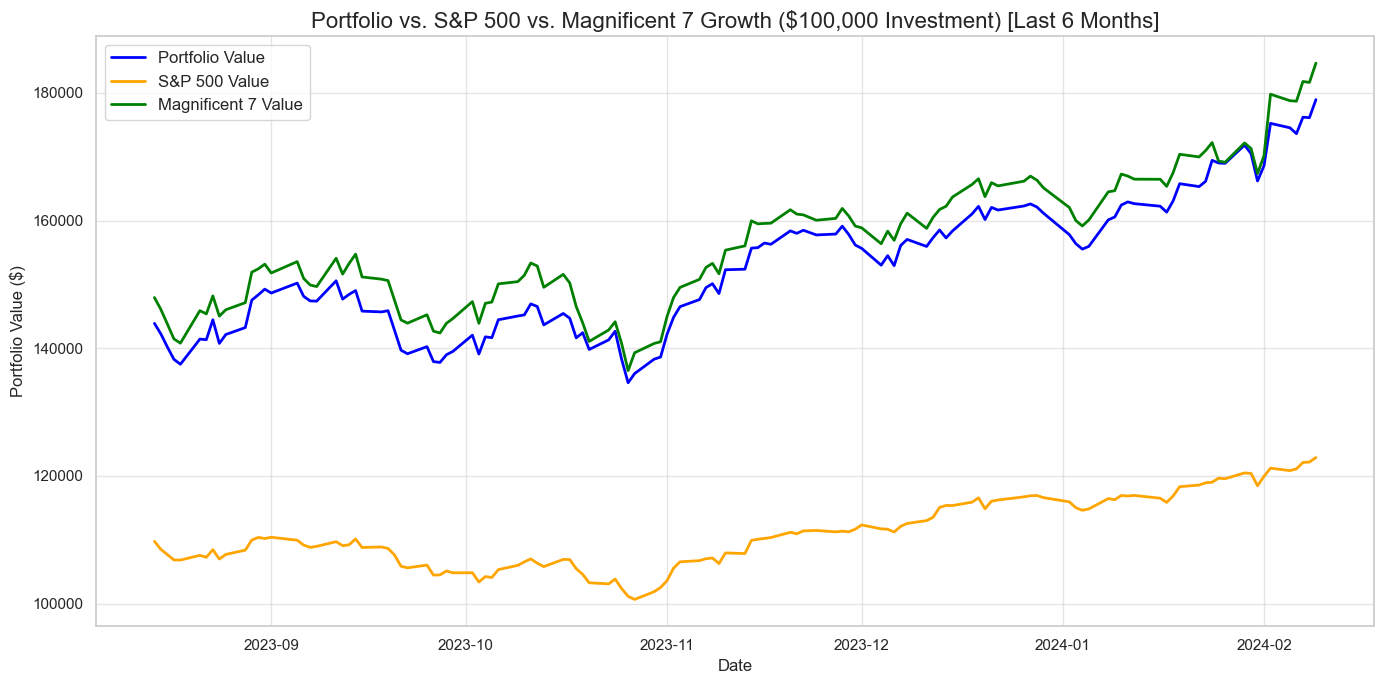

In [22]:

# 2️⃣ **Portfolio vs S&P 500 vs Magnificent 7 Growth ($100,000 Investment)**
plt.figure(figsize=(14, 7))
if not portfolio_value_filtered.empty: plt.plot(portfolio_value_filtered, label="Portfolio Value", color="blue", linewidth=2)
if not benchmark_value_filtered.empty: plt.plot(benchmark_value_filtered, label="S&P 500 Value", color="orange", linewidth=2)
if not magnificent_7_value_filtered.empty: plt.plot(magnificent_7_value_filtered, label="Magnificent 7 Value", color="green", linewidth=2)
plt.title(f"Portfolio vs. S&P 500 vs. Magnificent 7 Growth ($100,000 Investment) [Last 6 Months]", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Portfolio Value ($)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()



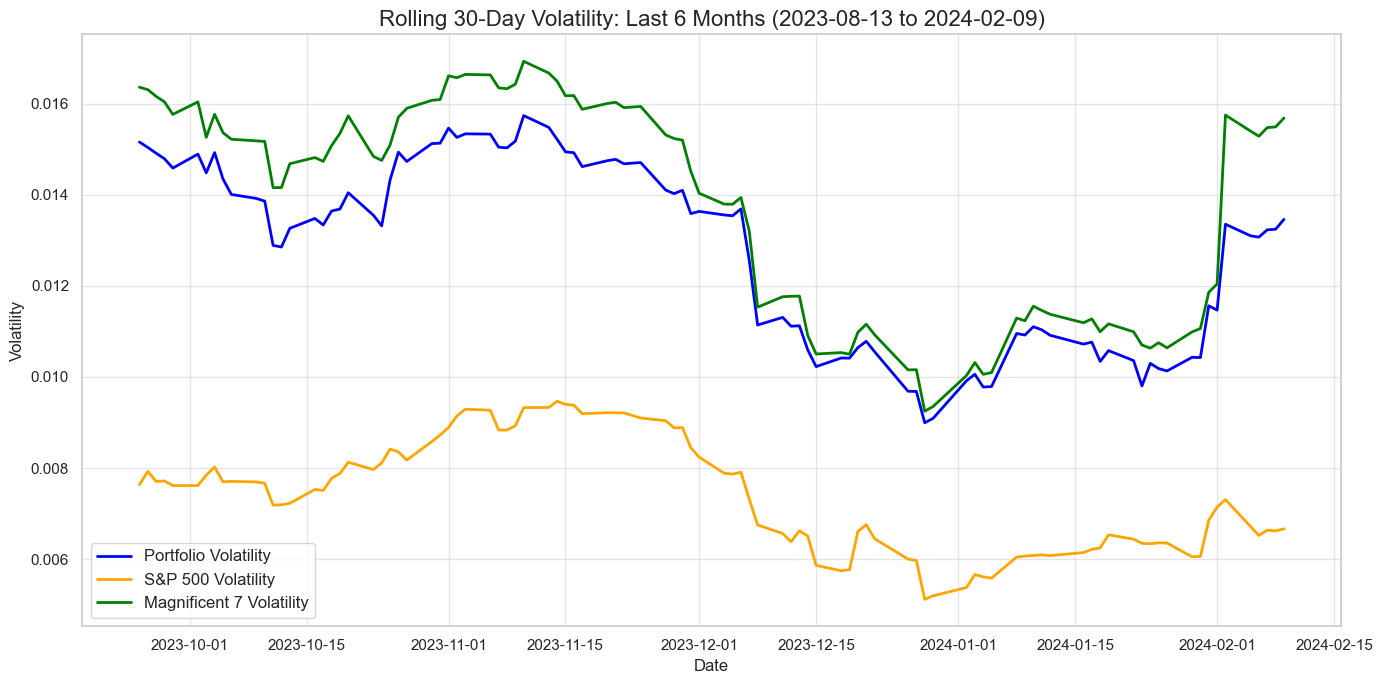

In [23]:
# 3️⃣ **Rolling 30-Day Volatility: Portfolio vs. S&P 500 vs. Magnificent 7**
plt.figure(figsize=(14, 7))
if not portfolio_returns_filtered.empty: plt.plot(portfolio_returns_filtered.rolling(30).std(), label="Portfolio Volatility", color="blue", linewidth=2)
if not benchmark_returns_filtered.empty: plt.plot(benchmark_returns_filtered.rolling(30).std(), label="S&P 500 Volatility", color="orange", linewidth=2)
if not magnificent_7_returns_filtered.empty: plt.plot(magnificent_7_returns_filtered.rolling(30).std(), label="Magnificent 7 Volatility", color="green", linewidth=2)
plt.title(f"Rolling 30-Day Volatility: Last 6 Months ({start_filter.date()} to {end_filter.date()})", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Volatility", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


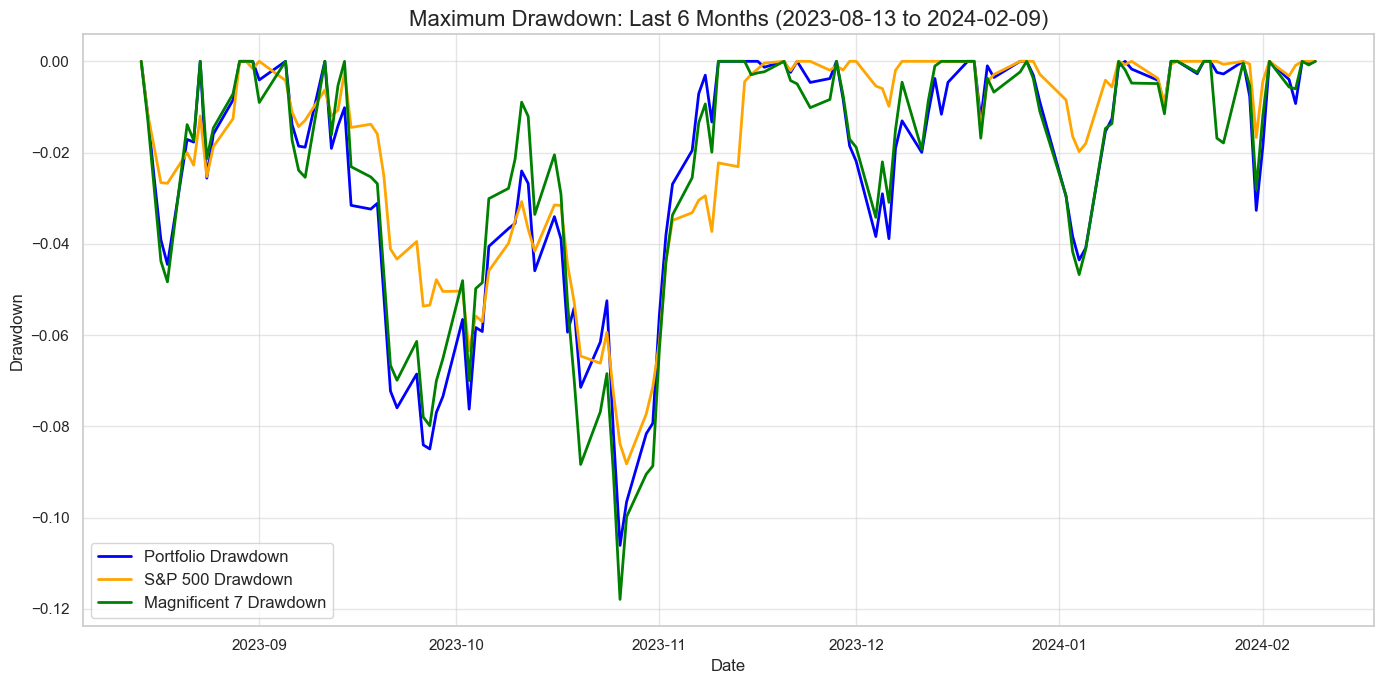

In [24]:

# 4️⃣ **Maximum Drawdown: Portfolio vs. S&P 500 vs. Magnificent 7**
plt.figure(figsize=(14, 7))
if not portfolio_cum_returns_filtered.empty: plt.plot((portfolio_cum_returns_filtered / portfolio_cum_returns_filtered.cummax()) - 1, label="Portfolio Drawdown", color="blue", linewidth=2)
if not benchmark_cum_returns_filtered.empty: plt.plot((benchmark_cum_returns_filtered / benchmark_cum_returns_filtered.cummax()) - 1, label="S&P 500 Drawdown", color="orange", linewidth=2)
if not magnificent_7_cum_returns_filtered.empty: plt.plot((magnificent_7_cum_returns_filtered / magnificent_7_cum_returns_filtered.cummax()) - 1, label="Magnificent 7 Drawdown", color="green", linewidth=2)
plt.title(f"Maximum Drawdown: Last 6 Months ({start_filter.date()} to {end_filter.date()})", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Drawdown", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

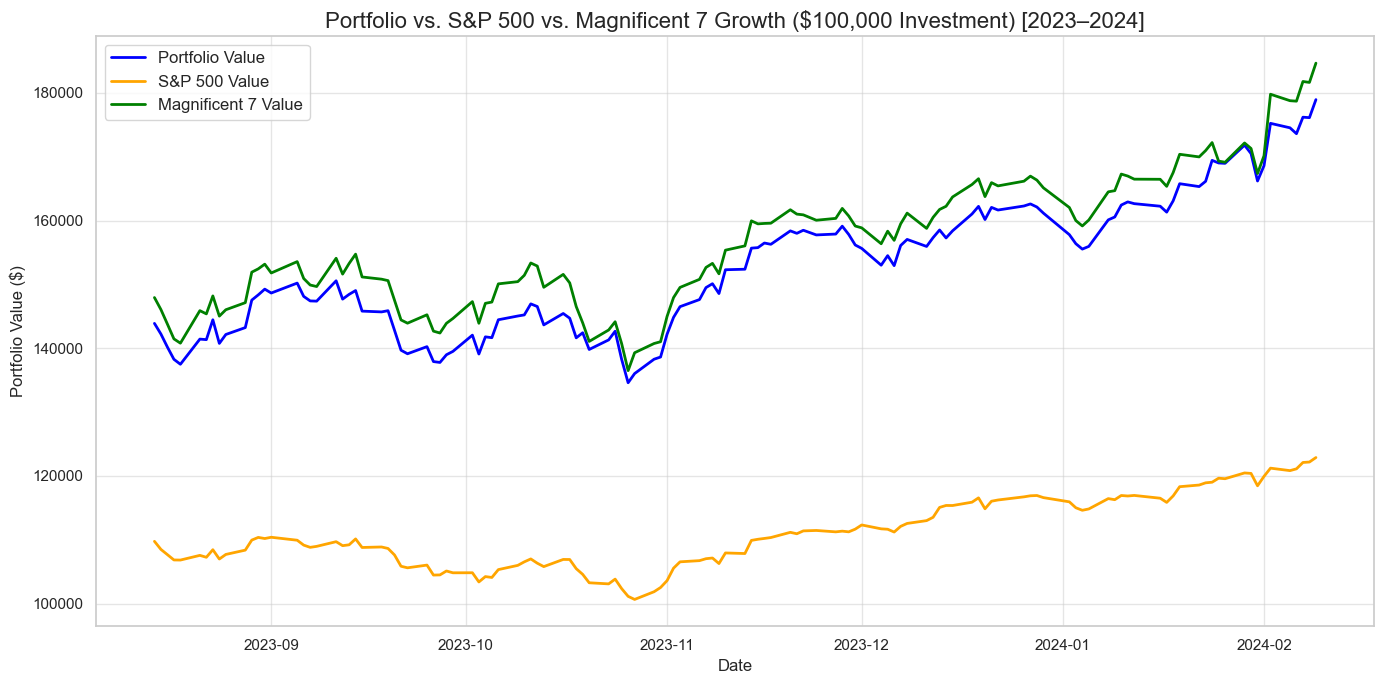

In [25]:
from datetime import datetime

# ✅ Function to calculate 1-Year Performance (Total Return for the Year)
def calculate_yearly_return(cum_returns, year):
    start_date = f"{year}-01-01"  # Start of the year
    end_date = f"{year}-12-31"  # End of the year
    
    # Ensure the dates exist in the dataset
    if start_date in cum_returns.index and end_date in cum_returns.index:
        return ((cum_returns.loc[end_date] / cum_returns.loc[start_date]) - 1) * 100
    else:
        return None  # Return None if data for the year is unavailable

# ✅ Get the latest available year in the dataset
latest_year = data.index.max().year

# ✅ Calculate 1-Year Returns for the last 2 available years
years_available = [latest_year - 1, latest_year]

portfolio_returns_yearly = {
    year: calculate_yearly_return(portfolio_cum_returns_filtered, year) for year in years_available
}
benchmark_returns_yearly = {
    year: calculate_yearly_return(benchmark_cum_returns_filtered, year) for year in years_available
}
magnificent_7_returns_yearly = {
    year: calculate_yearly_return(magnificent_7_cum_returns_filtered, year) for year in years_available
}

# ✅ Investment Growth ($100,000 in each) for the last 2 available years
initial_investment = 100000
portfolio_value_filtered = portfolio_cum_returns_filtered * initial_investment if not portfolio_cum_returns_filtered.empty else pd.Series()
benchmark_value_filtered = benchmark_cum_returns_filtered * initial_investment if not benchmark_cum_returns_filtered.empty else pd.Series()
magnificent_7_value_filtered = magnificent_7_cum_returns_filtered * initial_investment if not magnificent_7_cum_returns_filtered.empty else pd.Series()

# ✅ Plot Portfolio vs S&P 500 vs Magnificent 7 Growth ($100,000 Investment)
plt.figure(figsize=(14, 7))
if not portfolio_value_filtered.empty:
    plt.plot(portfolio_value_filtered, label="Portfolio Value", color="blue", linewidth=2)
if not benchmark_value_filtered.empty:
    plt.plot(benchmark_value_filtered, label="S&P 500 Value", color="orange", linewidth=2)
if not magnificent_7_value_filtered.empty:
    plt.plot(magnificent_7_value_filtered, label="Magnificent 7 Value", color="green", linewidth=2)

# ✅ Annotate 1-Year Performance for Each Available Year
for year in years_available:
    if portfolio_returns_yearly[year] is not None:
        plt.text(portfolio_value_filtered.index[-1], portfolio_value_filtered.iloc[-1],
                 f"{portfolio_returns_yearly[year]:.2f}%", fontsize=12, color="blue", weight='bold')
    
    if benchmark_returns_yearly[year] is not None:
        plt.text(benchmark_value_filtered.index[-1], benchmark_value_filtered.iloc[-1],
                 f"{benchmark_returns_yearly[year]:.2f}%", fontsize=12, color="orange", weight='bold')

    if magnificent_7_returns_yearly[year] is not None:
        plt.text(magnificent_7_value_filtered.index[-1], magnificent_7_value_filtered.iloc[-1],
                 f"{magnificent_7_returns_yearly[year]:.2f}%", fontsize=12, color="green", weight='bold')

plt.title(f"Portfolio vs. S&P 500 vs. Magnificent 7 Growth ($100,000 Investment) [{years_available[0]}–{years_available[1]}]", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Portfolio Value ($)", fontsize=12)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()



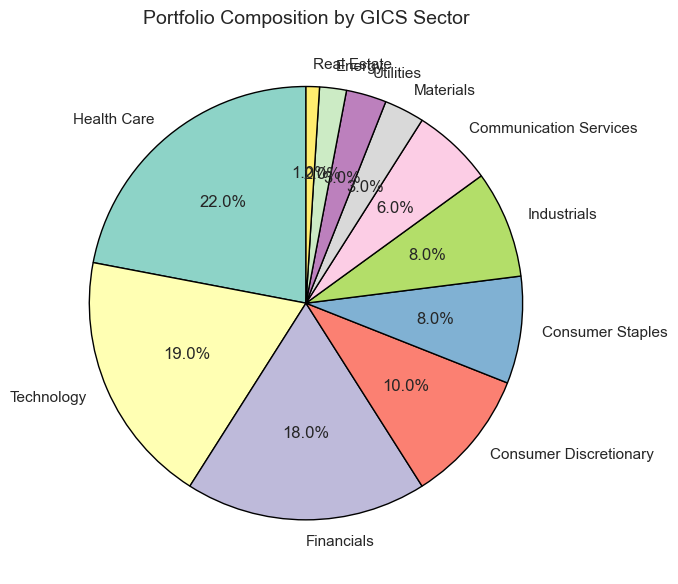

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Load tickers and sector data from `Top100.csv`
file_path = "Top100.csv"
df = pd.read_csv(file_path)

# Ensure columns exist
if "Ticker" not in df.columns or "Sector" not in df.columns:
    raise ValueError("❌ Error: `Top100.csv` must contain 'Ticker' and 'Sector' columns.")

# ✅ Create a ticker-to-sector mapping
ticker_sector_mapping = df.set_index("Ticker")["Sector"].to_dict()

# ✅ Map sectors to portfolio tickers
portfolio_sectors = [ticker_sector_mapping.get(ticker, "Unknown") for ticker in df["Ticker"]]

# ✅ Count occurrences of each sector
sector_counts = pd.Series(portfolio_sectors).value_counts()

# ✅ Plot portfolio composition by GICS Sector
plt.figure(figsize=(10, 6))
sector_counts.plot(kind="pie", autopct='%1.1f%%', startangle=90, cmap="Set3", wedgeprops={'edgecolor': 'black'})
plt.title("Portfolio Composition by GICS Sector", fontsize=14)
plt.ylabel("")  # Remove y-label
plt.tight_layout()
plt.show()


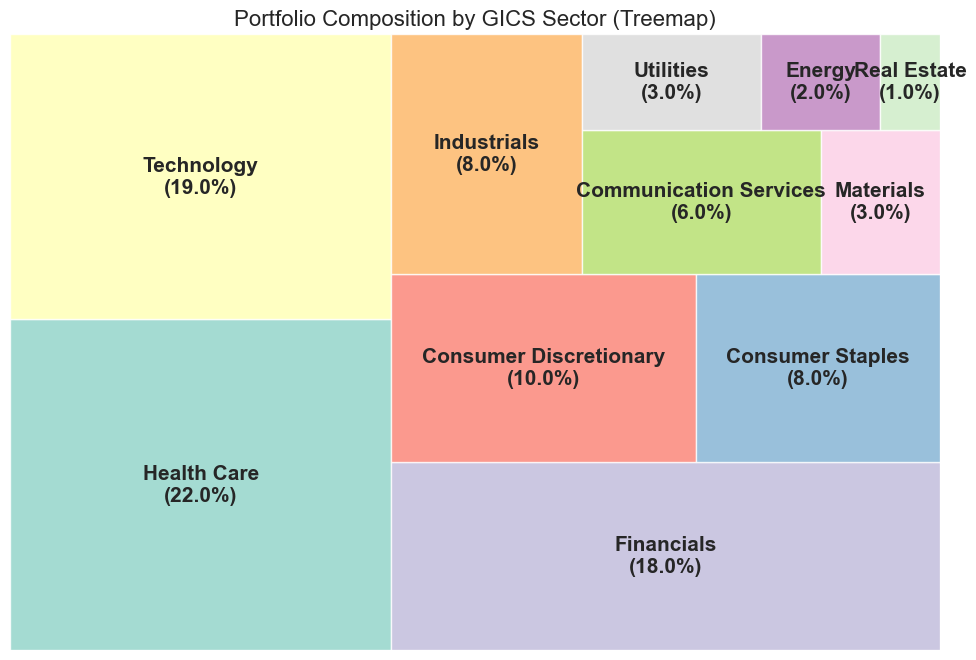

In [34]:
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ✅ Load tickers and sector data from `Top100.csv`
file_path = "Top100.csv"
df = pd.read_csv(file_path)

# Ensure required columns exist
if "Ticker" not in df.columns or "Sector" not in df.columns:
    raise ValueError("❌ Error: `Top100.csv` must contain 'Ticker' and 'Sector' columns.")

# ✅ Count occurrences of each sector
sector_counts = df["Sector"].value_counts(normalize=True) * 100  # Convert to percentage

# ✅ Convert to DataFrame for visualization
sector_df = pd.DataFrame({"Sector": sector_counts.index, "Allocation (%)": sector_counts.values})

# ✅ Create figure
fig, ax = plt.subplots(figsize=(12, 8))

# ✅ Define colors for the treemap
colors = sns.color_palette("Set3", len(sector_df))

# ✅ Create the treemap
squarify.plot(
    sizes=sector_df["Allocation (%)"], 
    label=[f"{sector}\n({allocation:.1f}%)" for sector, allocation in zip(sector_df["Sector"], sector_df["Allocation (%)"])],
    alpha=0.8, 
    color=colors, 
    ax=ax,  # Assign axes explicitly
    text_kwargs={'fontsize': 15, 'weight': 'bold'}
)

# ✅ Title
plt.title("Portfolio Composition by GICS Sector (Treemap)", fontsize=16)
plt.axis("off")  # Hide axes
plt.show()
